In [2]:
# Question at hand =
# 1. What age group smokes the most amount of cigarettes?
# 2. What age groups gets the most amount of heart attacks?
# 3. Is there a correlation between those 2?
# 4. Can we predict who is most succeptible to heart attacks solely based on their age and how many cigarettes per day they smoke?


#import the necessary Libraries. These are my go to libraries and the heart attack data

import pandas as pandas
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pandas.read_csv("heartattack_data.csv")

print(df)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [3]:
print(df.columns.tolist()[:-1])

['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [4]:
# Drop  categories with Null Values
df = df.dropna()
print(df)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4231     1   58        3.0              0         0.0     0.0   
4232     1   68        1.0              0         0.0     0.0   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [5]:
summary = df.describe()
print(summary)

              male          age    education  currentSmoker   cigsPerDay  \
count  3656.000000  3656.000000  3656.000000    3656.000000  3656.000000   
mean      0.443654    49.557440     1.979759       0.489059     9.022155   
std       0.496883     8.561133     1.022657       0.499949    11.918869   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  3656.000000      3656.000000   3656.000000  3656.000000  3656.000000   
mean      0.030361         0.005744      0.311543     0.027079   236.873085   
std       0.171602         0.075581      0.463187     0.162335    44.096223   

In [6]:
# Question at hand = Which columns correlate most with each other. This tells me the columns and correlations that has the largest impact on potential risk of heart attacks

import numpy as np

# Calculate the correlation matrix
corr_matrix = df.corr()

# Remove diagonal part
corr_matrix = corr_matrix.mask(np.equal(*np.indices(corr_matrix.shape)))

# Stack the correlation matrix and drop NaN values
corr_stacked = corr_matrix.stack().dropna()

# Get the absolute values and sort
corr_abs = corr_stacked.abs().sort_values(ascending=False)

# Get the top 6 correlations
top_6 = corr_abs.head(6)

# Print the result
print(top_6)

diaBP          sysBP            0.786727
sysBP          diaBP            0.786727
cigsPerDay     currentSmoker    0.773819
currentSmoker  cigsPerDay       0.773819
sysBP          prevalentHyp     0.697790
prevalentHyp   sysBP            0.697790
dtype: float64


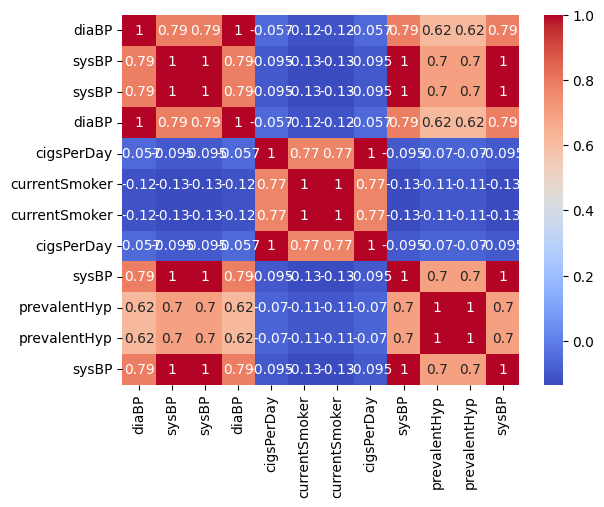

In [7]:
# Get the column names from the top 6 correlations
top_6_cols = list([col for pair in top_6.index for col in pair]) # Change set to list

# Create a correlation matrix for the top 6 columns
corr_matrix_top6 = df[top_6_cols].corr()

# Create a heatmap for the top 6 columns
sns.heatmap(corr_matrix_top6, annot=True, cmap='coolwarm')
plt.show()

This histogram tells me that the categories that correlates the most with each other are "diaBP" and "sysBP". "SysBP" has the highest correalation ratings with other categories. This tells me that that might be the most important categorie to look at when predicting future heart attacks.

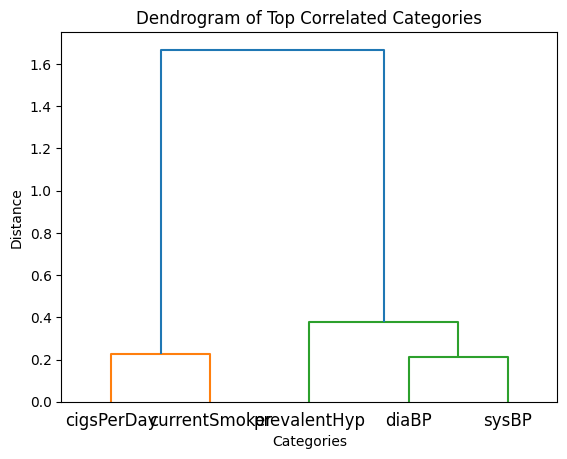

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform



#  column names from the correlation pairs
top_cols = ['diaBP', 'sysBP', 'cigsPerDay', 'currentSmoker', 'prevalentHyp']

# Calculate the correlation matrix
corr_matrix = df[top_cols].corr()

# Convert the correlation matrix to a distance matrix
distance_matrix = 1 - corr_matrix

#  hierarchical clustering
linkage_matrix = hierarchy.linkage(squareform(distance_matrix), method='ward')

# Create the dendrogram
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=top_cols, orientation='top')
plt.title('Dendrogram of Top Correlated Categories')
plt.xlabel('Categories')
plt.ylabel('Distance')
plt.show()

This tells me that cigs per day and current smoker has similar correlations to each other as diaBP and SysBP, but less correlation than Prevelent Hyp does to both diaBP and sysBP. This tells me that the result from prevalentHyp is more useful for predicting the results from "diaBp and sysBP"... which are the most useful categories to predicting heart attaches.

Accuracy: 0.8360655737704918
ROC AUC: 0.6785608707336738


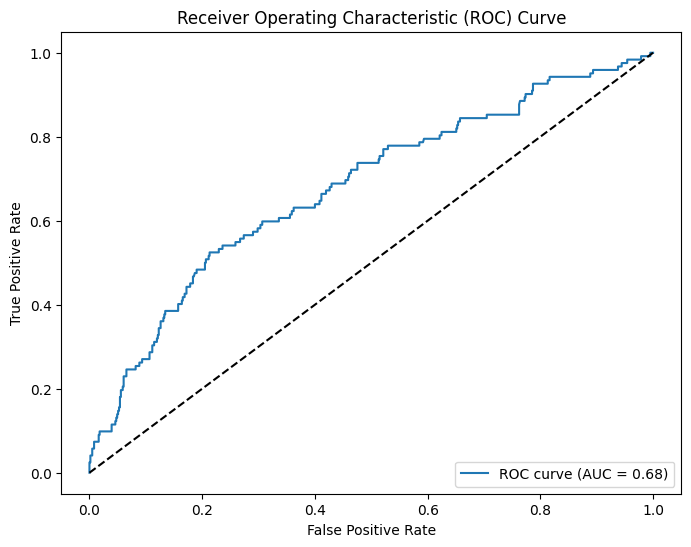

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the relevant columns and TenYearCHD

# Get unique column names from the correlation pairs (features)
features = ['diaBP', 'sysBP', 'cigsPerDay', 'currentSmoker', 'prevalentHyp']
target = 'TenYearCHD'

# Handle missing values (replace with mean - consider more robust methods)
df = df.fillna(df.mean())

# Split data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate ROC AUC score
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


This shows me that my model is very inaccurate because ethe AUC value is below 0.80.